In [143]:
import ISLP

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
Boston = ISLP.load_data("Boston")

In [146]:
# Create a binary variable for whether a subub's crime rate is above the median
Boston['crim01'] = (Boston['crim'] > Boston['crim'].median()).astype(int)

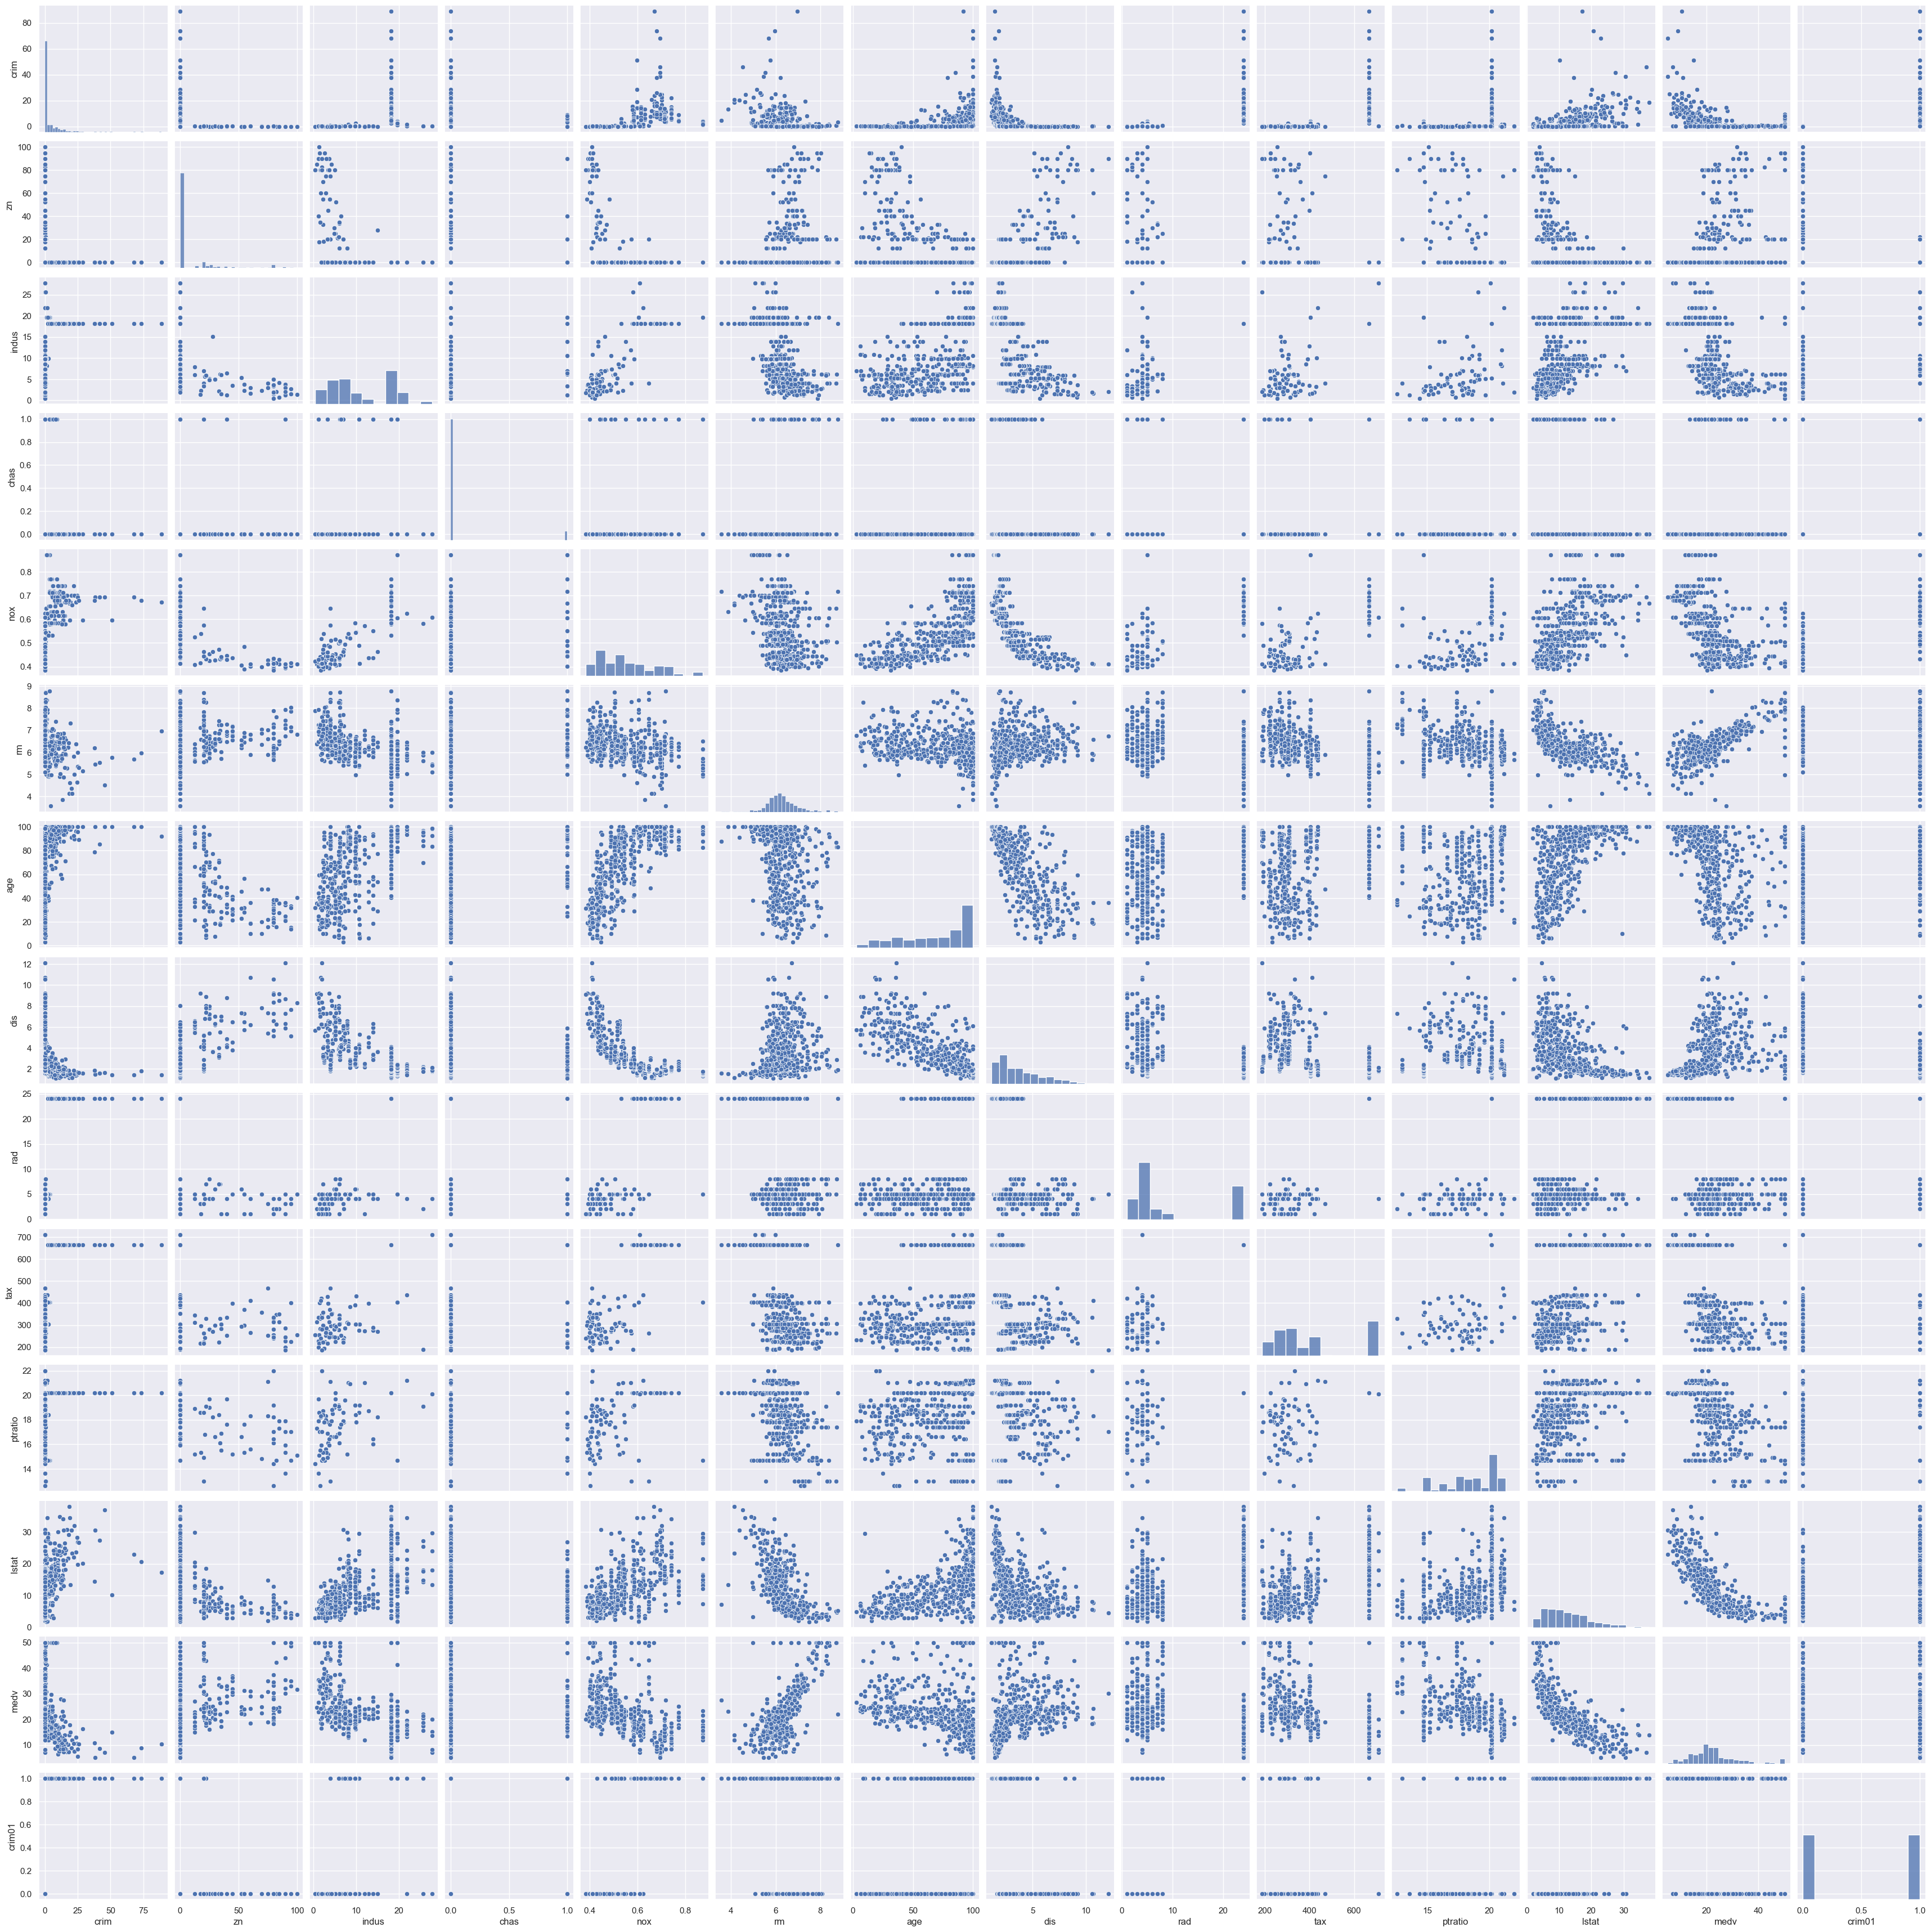

In [147]:
sns.set_theme()

sns.pairplot(Boston)

plt.savefig("out.png")

<Axes: >

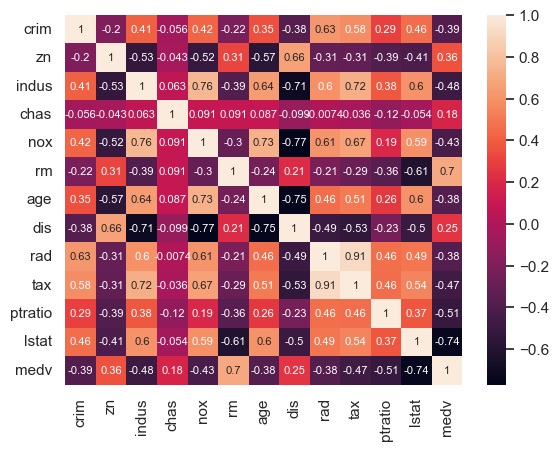

In [148]:
mat = Boston.drop(['crim01'], axis=1).corr()

sns.heatmap(mat, annot=True, annot_kws={'fontsize':8})

In [149]:
from ISLP import confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


In [150]:
def test_all_models(X_train, L_train, X_test, L_test, k):
    # LDA
    lda = LDA(store_covariance=True)
    lda.fit(X_train, L_train)
    lda_pred = lda.predict(X_test)
    confusion_table(lda_pred, L_test)


    # QDA
    qda = QDA(store_covariance=True)
    qda.fit(X_train, L_train)
    qda_pred = qda.predict(X_test)
    confusion_table(qda_pred, L_test)

    # NB
    nb = GaussianNB()
    nb.fit(X_train, L_train)
    nb_pred = nb.predict(X_test)
    confusion_table(nb_pred, L_test)


    # KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, L_train)
    knn_pred = knn.predict(X_test)
    confusion_table(knn_pred, L_test)

    return [
        ("LDA", np.mean(lda_pred == L_test)),
        ("QDA", np.mean(qda_pred == L_test)),
        ("NB", np.mean(nb_pred == L_test)),
        ("KNN", np.mean(knn_pred == L_test)),
    ]

In [151]:
from sklearn.model_selection import train_test_split

X = Boston.drop(['crim', 'crim01'], axis=1)
y = Boston['crim01']

X_train, X_test, L_train, L_test = train_test_split(X, y, test_size=0.2)

all_results = []
k_results = []

for k in range(1, 30):
  results = test_all_models(X_train, L_train, X_test, L_test, k)
  k_results.append(results[-1][1])
  all_results.append(results)

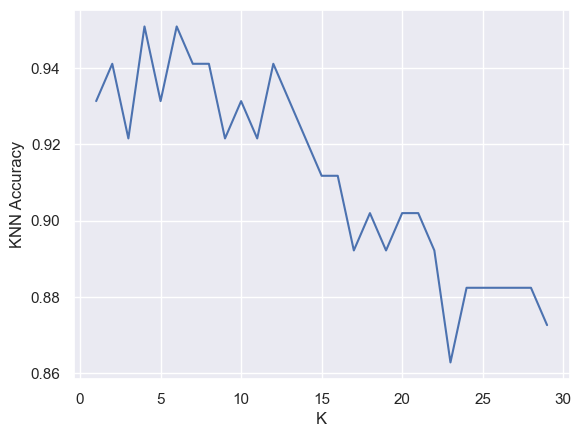

In [152]:
k = [i for i in range(1, 30)]

sns.lineplot(x=k, y=k_results)
plt.xlabel("K")
plt.ylabel("KNN Accuracy")

plt.show()

In [153]:
k_results

[np.float64(0.9313725490196079),
 np.float64(0.9411764705882353),
 np.float64(0.9215686274509803),
 np.float64(0.9509803921568627),
 np.float64(0.9313725490196079),
 np.float64(0.9509803921568627),
 np.float64(0.9411764705882353),
 np.float64(0.9411764705882353),
 np.float64(0.9215686274509803),
 np.float64(0.9313725490196079),
 np.float64(0.9215686274509803),
 np.float64(0.9411764705882353),
 np.float64(0.9313725490196079),
 np.float64(0.9215686274509803),
 np.float64(0.9117647058823529),
 np.float64(0.9117647058823529),
 np.float64(0.8921568627450981),
 np.float64(0.9019607843137255),
 np.float64(0.8921568627450981),
 np.float64(0.9019607843137255),
 np.float64(0.9019607843137255),
 np.float64(0.8921568627450981),
 np.float64(0.8627450980392157),
 np.float64(0.8823529411764706),
 np.float64(0.8823529411764706),
 np.float64(0.8823529411764706),
 np.float64(0.8823529411764706),
 np.float64(0.8823529411764706),
 np.float64(0.8725490196078431)]

In [154]:
max(k_results)

np.float64(0.9509803921568627)

In [155]:
all_results[0]

[('LDA', np.float64(0.9019607843137255)),
 ('QDA', np.float64(0.9411764705882353)),
 ('NB', np.float64(0.8529411764705882)),
 ('KNN', np.float64(0.9313725490196079))]

In [156]:
max(k_results)

np.float64(0.9509803921568627)

In [157]:
all_results[0]

[('LDA', np.float64(0.9019607843137255)),
 ('QDA', np.float64(0.9411764705882353)),
 ('NB', np.float64(0.8529411764705882)),
 ('KNN', np.float64(0.9313725490196079))]

In [158]:
from ISLP.models import summarize

In [159]:
import statsmodels.api as sm

In [160]:
glm_train = sm.GLM(L_train,
X_train,
family=sm.families.Binomial())
results = glm_train.fit()

In [161]:
summarize(results)

,coef,std err,z,P>|z|
zn,-0.0596,0.024,-2.465,0.014
indus,0.0186,0.039,0.483,0.629
chas,-0.4112,0.629,-0.654,0.513
nox,12.4110,3.749,3.311,0.001
rm,-1.3800,0.554,-2.490,0.013
age,0.0237,0.010,2.304,0.021
dis,-0.1181,0.159,-0.744,0.457
rad,0.5265,0.129,4.093,0.000
tax,-0.0066,0.003,-2.463,0.014
ptratio,-0.0648,0.088,-0.735,0.462


The variables most strongly correlated in determining the crime rate are: nitrogen oxide concentration (more is higher crime), average number of rooms per dwelling (less is higher crime), age (more is higher crime), accesibility to radial highways (more is higher crime), and property taxes (less is higher crime).